# Metoda gradientu prostego

### Podstawy metody gradientu prostego

Załóżmy, że mamy funkcję f, która przyjmuje wektor liczb rzeczywistych i na ich podstawie generuje jedną liczbę rzeczywistą.

In [1]:
# Przykładowa funkcja

from typing import List

Vector = List[float]

# Iloczyn skalarny
def dot(v: Vector, w: Vector) -> float:
    """Oblicza v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "wektory muszą mieć taką samą długość"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))


def sum_of_squares(v: Vector) -> float:
    """Oblicza sumę elementów obiektu v podniesionych do kwadratu."""
    return dot(v, v)

Bardzo często będziemy musieli znaleźć minima i maksima takich funkcji, a więc będziemy określać wejściowy wektor v, który pozwala na uzyskanie największej lub najmniejszej wartości.

W przypadku naszych funkcji gradient (wektor częściowych pochodnych) wskazuje wejściowy kierunek, w którym wartości wyjściowe funkcji rosną szybciej.

Jednym sposobem na znalezienie maksimum funkcji jest wybranie losowego punktu początkowego, obliczenie gradientu i wykonanie małego kroku w kierunku określonym przez gradient, a następnie powtórzenie tej operacji od kolejnego punktu. Podobnie można szukać minimum - małe kroki w przeciwnym kierunku.

### Szacowanie gradientu

Jeśli f jest funkcją jednej zmiennej, to jej pochodna w punkcie x określa charakter zmiany wartości f(x) przy bardzo małej zmianie wartości x. Definiuje się to jako granicę ilorazu różnicowego:

In [2]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h
# gdy h dąży do zera

Pochodna jest nachyleniem linii stycznej w punkcie (x, f(x)), a iloraz różnicowy jest nachyleniem linii nie do końca stycznej przechodzącej przez punkt (x+h, f(x+h)). Gdy h maleje, linia nie do konca styczna zbliża się coraz bardziej do linii stycznej.

In [3]:
# Przykład funkcji podnoszącej do kwadratu
def square(x: float) -> float:
    return x * x

In [4]:
# Jej pochodna
def derivative(x: float) -> float:
    return 2 * x

W przypadku gdy nie da się znaleźć gradientu można oszacować pochodne określając iloraz różnicowy dla bardzo małych wartości e.

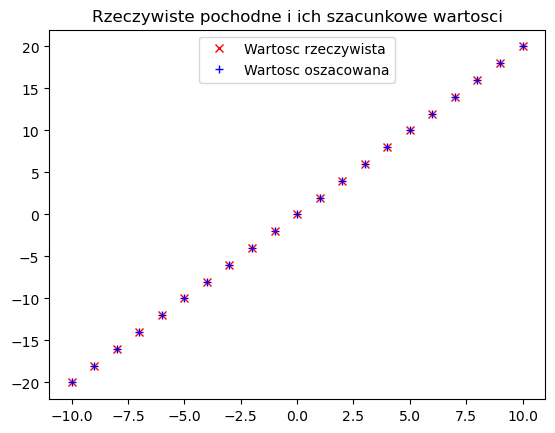

In [5]:
 xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]
    
# Wykres pokazuje, że uzyskane wartości są praktycznie identyczne.
import matplotlib.pyplot as plt
plt.title("Rzeczywiste pochodne i ich szacunkowe wartosci")
plt.plot(xs, actuals, 'rx', label='Wartosc rzeczywista')       # czerwony x
plt.plot(xs, estimates, 'b+', label='Wartosc oszacowana')   # niebieski +
plt.legend(loc=9)
plt.show()

Jeżeli f jest funkcją wielu zmiennych, to ma wiele pochodnych cząstkowych. Każda z nich wskazuje, jak zmieniają się wartości funkcji f w wyniku małych zmian poszczególnych zmiennych wejściowych.

Wartość i-tej pochodnej cząstkowej obliczamy, traktując ją jako funkcję tylko i-tej zmiennej przy utrzymaniu stałych wartości pozostałych zmiennych:

In [6]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                    v: Vector,
                                    i: int,
                                    h: float) -> float:
        """Oblicz i-ty iloraz różnicowy pochodnej cząstkowej f wektora v."""
        w = [v_j + (h if j == i else 0)    # Dodaj h tylko do i-tego elementu wektora v.
            for j, v_j in enumerate(v)]
    
        return (f(w) - f(v)) / h

In [7]:
# Gradient
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

### Korzystanie z gradientu

Funkcja sum_of_squares generuje najmniejszą wartość, gdy wejściowy wektor składa się z samych zer. 

Załóżmy, że tego nie wiemy i skorzystajmy z gradientów w celu określenia minimum wszystkich trójwymiarowych wektorów.

Wybieramy losowy punkt początkowy, a następnie będziemy przechodzić w kierunku przeciwnym do gradientu aż do znalezienia punktu, w którym gradient jest bardzo mały:

In [8]:
import random 

def distance(v: Vector, w: Vector) -> float:
    """Oblicza odległość pomiędzy v i w"""
    return math.sqrt(squared_distance(v, w))

def distance(v: Vector, w: Vector) -> float:  # type: ignore
    return magnitude(subtract(v, w))

def add(v: Vector, w: Vector) -> Vector:
    """dodawanie wektorów"""
    assert len(v) == len(w), "wektory muszą mieć tę samą długość"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Mnoży każdy element przez c"""
    return [c * v_i for v_i in v]


def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Przejdź o step_size w kierunku gradient od punktu v."""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# Wybierz losowy punkt początkowy.
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)    # Oblicz gradient  w punkcie v.
    v = gradient_step(v, grad, -0.01)    # tWykonaj krok w kierunku przeciwnym do gradientu
    print(epoch, v)
    

0 [3.9156857351200522, -8.325098180296083, 5.311348086172827]
1 [3.8373720204176514, -8.15859621669016, 5.20512112444937]
2 [3.7606245800092983, -7.995424292356357, 5.101018701960383]
3 [3.6854120884091124, -7.83551580650923, 4.998998327921175]
4 [3.61170384664093, -7.6788054903790455, 4.899018361362751]
5 [3.5394697697081114, -7.5252293805714645, 4.801037994135496]
6 [3.468680374313949, -7.374724792960035, 4.705017234252786]
7 [3.39930676682767, -7.227230297100834, 4.61091688956773]
8 [3.3313206314911166, -7.082685691158818, 4.518698551776375]
9 [3.2646942188612944, -6.9410319773356415, 4.428324580740848]
10 [3.1994003344840687, -6.802211337788929, 4.339758089126032]
11 [3.1354123277943873, -6.66616711103315, 4.2529629273435114]
12 [3.0727040812384994, -6.532843768812487, 4.167903668796641]
13 [3.0112499996137294, -6.402186893436237, 4.084545595420709]
14 [2.951024999621455, -6.274143155567512, 4.002854683512294]
15 [2.8920044996290257, -6.148660292456162, 3.922797589842048]
16 [2.834

### Dobór właściwego rozmiaru kroku

Dobór właściwego rozmiaru kroku to kwestia wyczucia i eksperymentowania. Do popularnych rozwiązań należy:
- Korzystanie z kroku o stałym rozmiarze
- Stopniowe zmniejszamie rozmiaru kroku podczas kolejnych iteracji kodu
- Dobieranie rozmiaru każdego kroku tak, aby zminimalizował on wartość funkcji celu

### Używanie metody gradientu do dopasowywania modeli

Będziemy używać metody gradientu prostego do dopasowywania parametryzowanych modeli do danych. W typowym przypadku będziemy mieli zbiór danych oraz potencjalny model opisujący te dane, który zależy w pewnym stopniu od jednego lub więcej parametrów. Będziemy dysponowali także tzw. funkcją straty, która mierzy, jak dobrze model pasuje do danych (im mniejszy wynik tym lepiej).

Jeżeli dane są poprawne, to funkcja strat mówi jak dobrze dopasowane są konkretne parametry modelu. Oznacza to, że możemy użyć metody gradientu, aby znaleźć takie parametry, przy których funkcja straty zwraca jak najmniejsze wartości.

In [9]:
# Przykład
# x jest z zakresu od –50 do 49, y wynosi zawsze 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In [10]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # Przewidywanie modelu.
    error = (predicted - y)              # Błąd obliczamy jako (predicted – actual).
    squared_error = error ** 2           # Minimalizujemy błąd kwadratowy,
    grad = [2 * error * x, 2 * error]    # używając jego gradientu.
    return grad

In [11]:
# gradient średniego błędu kwadratowego jest średnią indywidualnych gradientów

def vector_sum(vectors: List[Vector]) -> Vector:
    """Sumuje listę wektorów"""
    # Sprawdzenie, czy lista wektorów nie jest pusta
    assert vectors, "brak wektorów!"

    # Sprawdzenie, czy wszystkie wektory mają taką samą długość
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "różne długości!"

    # i-ty element wektora wynikowego jest sumą elementów [i] każdego wektora
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]
    
# Średnia wektorów o tych samych wymiarach
def vector_mean(vectors: List[Vector]) -> Vector:
    """Oblicza wektor, którego i-ty element jest średnią i-tych elementów wektorów wejściowych."""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))


# Rozpoczynamy od losowych wartości nachylenia (slope) i wyrazu wolnego (intercept) funkcji liniowej
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
learning_rate = 0.001
    
for epoch in range(5000):
    # Obliczamy średnią gradientów
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Robimy krok w tym kierunku
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta

0 [32.84061136997077, -0.9576050467035904]
1 [11.429354611182777, -0.9328492252402125]
2 [25.710687625115845, -0.9295541721785494]
3 [16.185041799875556, -0.9119843762090765]
4 [22.538665135106793, -0.9039753656567828]
5 [18.30080637951811, -0.8896287497903624]
6 [21.127472516111627, -0.8795486859112636]
7 [19.242096283067635, -0.8666621160233294]
8 [20.499655117077864, -0.8556866955082151]
9 [19.660874350213557, -0.8434756670001208]
10 [20.220353332740558, -0.832127841315907]
11 [19.847192199220732, -0.8202432323005346]
12 [20.09610255988747, -0.8087555536367128]
13 [19.93009083700142, -0.7970419399695519]
14 [20.040832369780084, -0.7855177652526114]
15 [19.966979291591432, -0.7739058973523261]
16 [20.016250906611162, -0.76239110626603]
17 [19.983398254184088, -0.7508500731468868]
18 [20.005322514386066, -0.7393649747464089]
19 [19.99071051792975, -0.72788092228253]
20 [20.000468203618574, -0.7164344499200351]
21 [19.99397127373649, -0.7050011128165765]
22 [19.998316159304945, -0.6935

In [12]:
assert 19.9 < slope < 20.1,   "wartość slope powinna wynosić około 20"
assert 4.9 < intercept < 5.1, " wartość intercept powinna wynosić około 5"

### Metody gradientu prostego: stochastyczna i minibatch

W metodzie minibatch obliczamy gradient na podstawie próbki danych pobranych z całego zbioru

In [13]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # # dzięki temu możemy pisać funkcje generyczne (bez określonego typu)

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generuje próbkę ze zbioru danych o rozmiarze batch_size"""
    # start przyjmuje wartości: 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # pomieszaj podzbiory

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [14]:
# Przykład: minibatch
    
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta

0 [16.678821680882802, 1.049005739419947]
1 [20.458177097530857, 0.5951278180689452]
2 [19.849207054752878, 0.525483485440821]
3 [19.779620972413205, 0.5491371937321753]
4 [20.657548901254255, 0.5915373357129721]
5 [20.181188095575354, 1.0118454115144364]
6 [20.29497597331377, 1.0223179994506402]
7 [19.642219640456545, 1.0705662005642544]
8 [20.081667868123553, 1.1262096162729918]
9 [20.140869922558803, 1.2655096920107134]
10 [20.013083311013286, 1.4340207449697455]
11 [20.12515188005793, 1.5362456608675163]
12 [19.840862606527956, 1.5439425737000534]
13 [20.206109681776052, 1.5756013848063766]
14 [20.02013603907951, 1.7398399106314355]
15 [19.808031902044085, 1.7500704186737792]
16 [20.0975565333365, 1.8232909803536075]
17 [19.872169829941804, 1.9647021366597293]
18 [20.59774667774283, 2.002043606054636]
19 [19.91414825022398, 2.1371472733928223]
20 [20.189111371576132, 2.149795391273225]
21 [20.01813212255051, 2.2872713913587854]
22 [20.09625129300877, 2.368167310547954]
23 [19.89930

In [15]:
assert 19.9 < slope < 20.1,   "wartość slope powinna wynosić około 20"
assert 4.9 < intercept < 5.1, "wartość intercept powinna wynosić około 5"